In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
from plotnine import *

In [20]:
class theme_fs(theme_light):
    """
    A theme similar to :class:`theme_linedraw` but with light grey
    lines and axes to direct more attention towards the data.
    Parameters
    ----------
    base_size : int, optional
        Base font size. All text sizes are a scaled versions of
        the base font size. Default is 11.
    base_family : str, optional
        Base font family.
    """

    def __init__(self, base_size=11, base_family='DejaVu Sans'):
        theme_light.__init__(self, base_size, base_family)
        self.add_theme(theme(
            axis_ticks=element_line(color='#DDDDDD', size=0.5),
            panel_border=element_rect(fill='None', color='#838383',
                                      size=1),
            strip_background=element_rect(
                fill='#DDDDDD', color='#838383', size=1),
            strip_text_x=element_text(color='black'),
            strip_text_y=element_text(color='black', angle=-90),
            legend_key=element_blank(),
        ), inplace=True)

In [3]:
df = pd.read_csv('./data/settles.acl16.learning_traces.13m.csv.gz')
df['delta_days'] = df['delta'].apply(lambda d: d / (60 * 60 * 24))

In [ ]:
df = df.head(3000)

In [25]:
df.columns

Index(['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen',
       'history_correct', 'session_seen', 'session_correct', 'delta_days'],
      dtype='object')

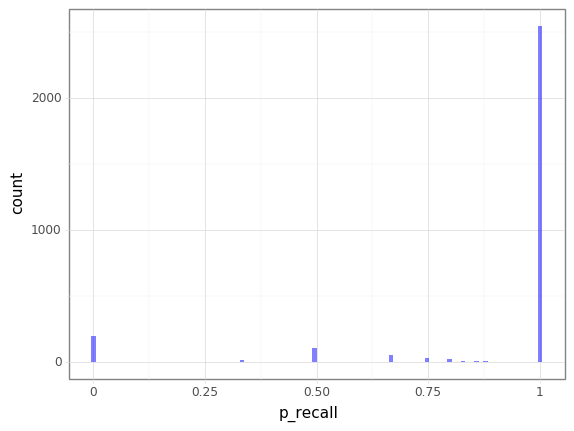

<ggplot: (8735083299793)>

In [233]:
(
    ggplot(df)
    + geom_bar(
        aes(x='p_recall'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 61 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


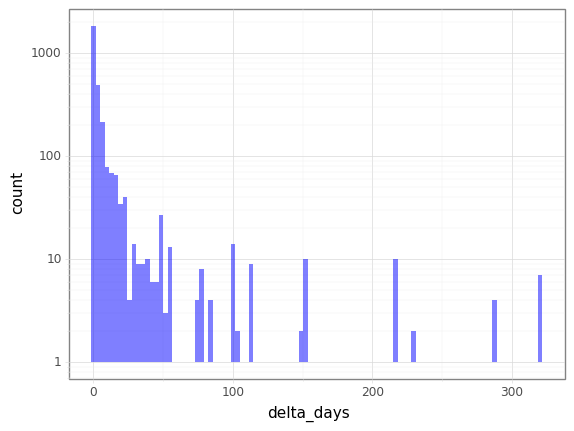

<ggplot: (8735083373793)>

In [232]:
(
    ggplot(df)
    + geom_bar(
        aes(x='delta_days'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 26 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


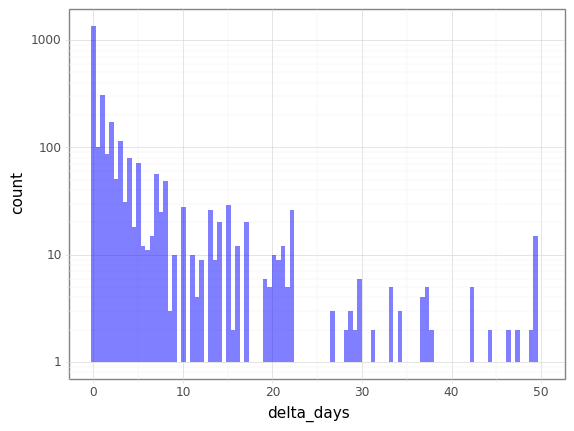

<ggplot: (8735083427985)>

In [231]:
(
    ggplot(df.loc[df.delta_days < 50])
    + geom_bar(
        aes(x='delta_days'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 72 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


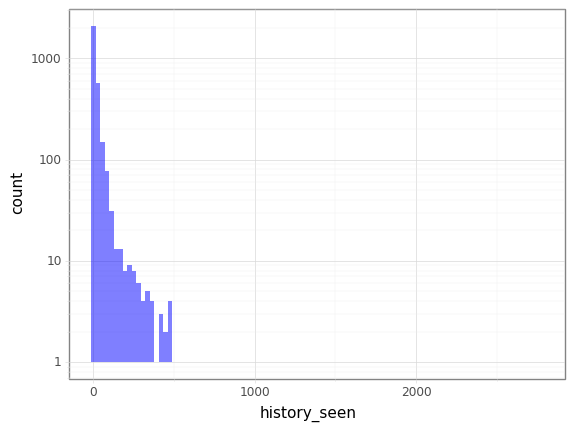

<ggplot: (8735083464589)>

In [230]:
(
    ggplot(df)
    + geom_bar(
        aes(x='history_seen'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

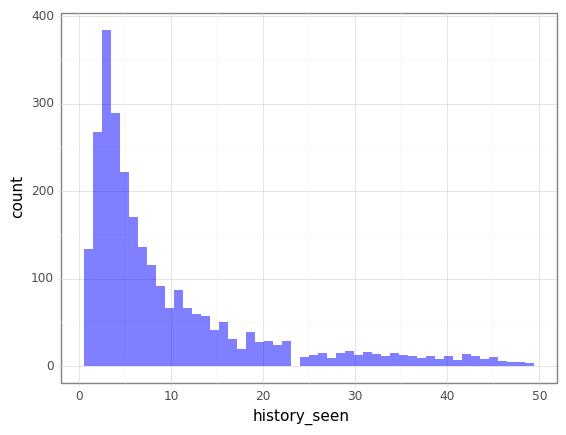

<ggplot: (8735083257217)>

In [234]:
(
    ggplot(df.loc[df.history_seen < 50])
    + geom_bar(
        aes(x='history_seen'),
        stat=stat_bin(bins=50),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 72 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


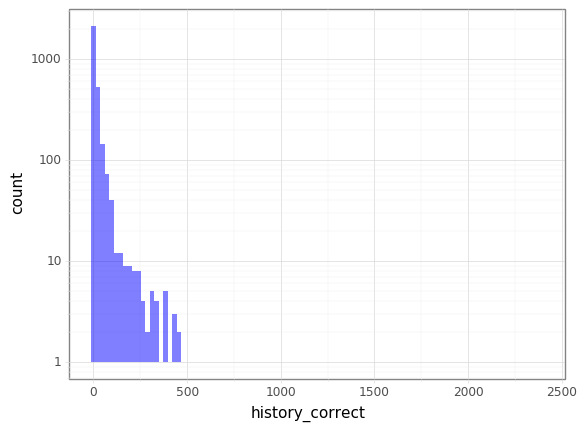

<ggplot: (8735083751585)>

In [228]:
(
    ggplot(df)
    + geom_bar(
        aes(x='history_correct'),
        stat=stat_bin(bins=100),
        fill='blue',
        alpha=0.5
    )
    + scale_y_log10()
    + theme_fs()
)

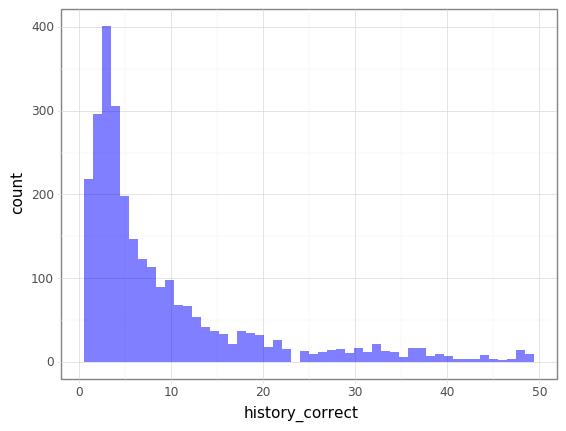

<ggplot: (8735083611477)>

In [227]:
(
    ggplot(df.loc[df.history_correct < 50])
    + geom_bar(
        aes(x='history_correct'),
        stat=stat_bin(bins=50),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

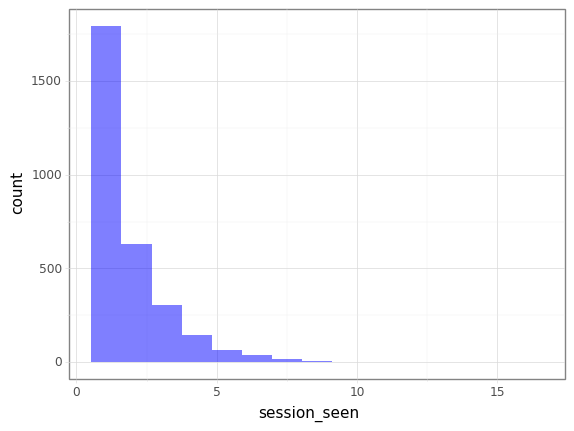

<ggplot: (8735083267349)>

In [236]:
(
    ggplot(df)
    + geom_bar(
        aes(x='session_seen'),
        stat=stat_bin(bins=15),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

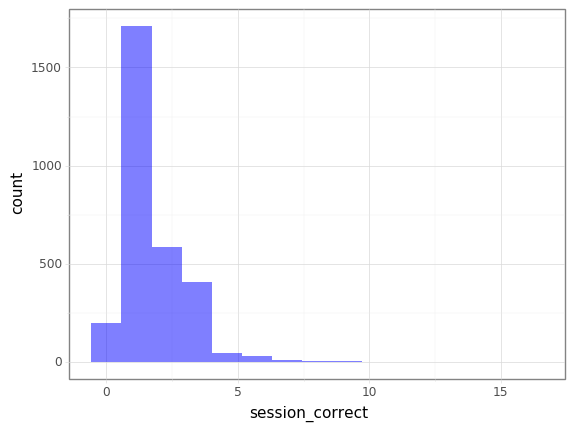

<ggplot: (8735083472221)>

In [237]:
(
    ggplot(df)
    + geom_bar(
        aes(x='session_correct'),
        stat=stat_bin(bins=15),
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
)

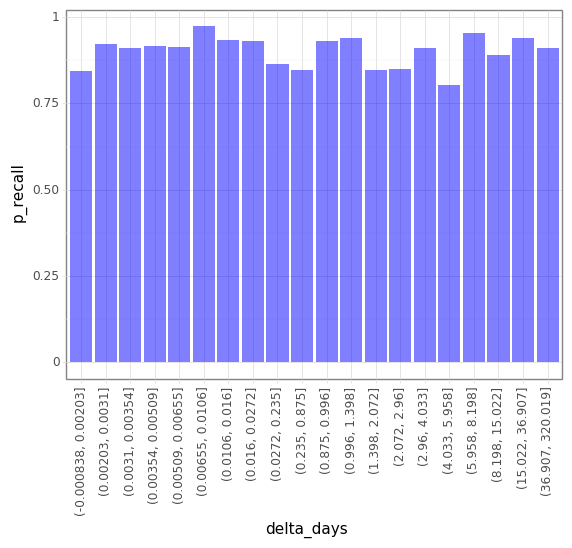

<ggplot: (8735083941921)>

In [219]:
def _bin_p_recall(group):
    return pd.DataFrame([{'p_recall': group.p_recall.mean()}])
(
    ggplot(
        df.groupby(
            pd.qcut(df.delta_days, 20)
        ).apply(_bin_p_recall).reset_index()
    )
    + geom_bar(
        aes(x='delta_days', y='p_recall', ymin=0.75, ymax=1.0),
        stat='identity',
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

## Variations of Half-life regression (HLR)

short-hand for each record \begin{align}<\cdot>&=<\Delta,x,P[\text{recall}]\in[0,1]>\\&=<\Delta,x,y\in\{0,1\}>\end{align}

Regression against recall probability $$l_\text{recall}(<\cdot>;\theta)=(p-f_\theta(x,\Delta))^2$$

Regression against back-solved half-life $$l_\text{half-life}(<\cdot>;\theta)=(\frac{-\Delta}{\log_2{p}}-f_\theta(x,\Delta))^2$$

Binary recall classification $$l_\text{binary}(<\cdot>;\theta)=\text{xent}(f_\theta(x,\Delta),y)$$

Assume that half-life increases exponentially with each repeated exposure, with a linear approximator, you get $f_\theta(x,\Delta)=2^{\theta\cdot x}$. Use this parameterization with regression against both recall probability and back-solved half-life, you get Settles' formulation:
$$l(<\cdot>; \theta)=(p-2^{\frac{\Delta}{2^{\theta\cdot x}}})^2+\alpha(\frac{\Delta}{\log_2(p)}-2^{\theta\cdot{x}})^2+\lambda|\theta|_2^2$$
Note that this formulation incorporates two heuristics
1. the memory strength follows an exponential forgetting curve, hence the half-life
2. half-life increases exponentially with number of repetitions

Doesn't this mean memory strength is a linear function of number of repetitions?

There are several knobs to be tweaked in the general formulation:
- labels: derived $p$, binary $y$
- linear, nn
- on/off: exponentially increased half-life
- on/off: loss wrt back-solved half-life (from derived $p$)

## reliability diagram, expected calibration error

In multi-class classification setting, the general idea of calibration is that confidence should match accuracy, i.e. when the model is 60% confidence, the probability of it being correct should be 60%.

reliability diagram: bin validation examples by predicted probability, then calculate the average accuracy within each bin, plot average accuracy against confidence. ideal calibration should be a diagonal line.

expected calibration error (ECE):  the difference in expectation between confidence and accuracy is
$$\mathbb{E}_{\hat{P}}[|\mathbb{P}(\hat{Y}=Y|\hat{P}=p)-p)|$$
This can be approximated by a weighted average of bins' accuracy - confidence difference (the gap showns as red bars in reliability diagrams)
$$\text{ECE}=\sum_{i}\frac{|B_i|}{n}|\text{acc}(B_m)-\text{conf}(B_m)|$$

/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 2 rows containing missing values.
  data = self.position.setup_data(self.data, params)


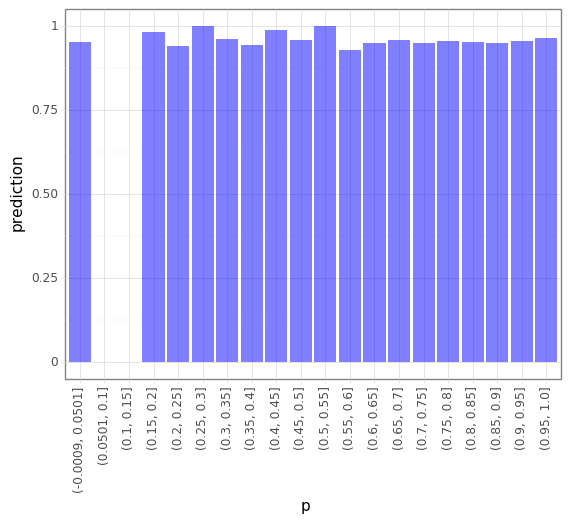

<ggplot: (8735083952833)>

In [221]:
def _bin_prediction(group):
    return pd.DataFrame([{'prediction':  group.pp.mean()}])

(
    ggplot(
        results.groupby(
            pd.cut(results.p, 20)
        ).apply(_bin_prediction).reset_index()
    )
    + geom_bar(
        aes(x='p', y='prediction'),
        stat='identity',
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

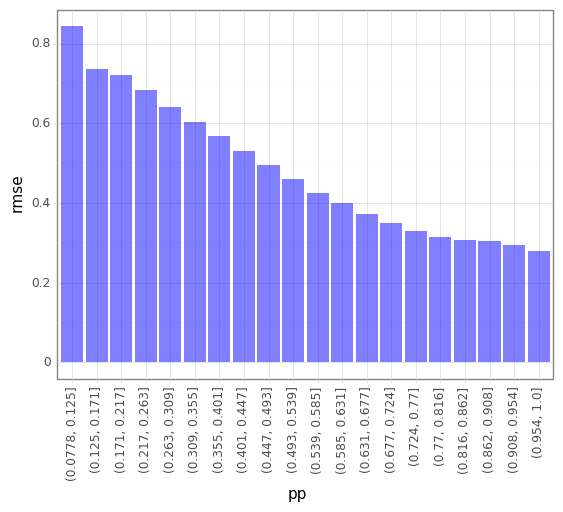

<ggplot: (8735083780933)>

In [223]:
def _bin_rmse(group):
    return pd.DataFrame([{
        'rmse':  ((group.pp - group.p) ** 2).mean() ** (1/2)
    }])

(
    ggplot(
        results.groupby(
            pd.cut(results.pp, 20)
        ).apply(_bin_rmse).reset_index()
    )
    + geom_bar(
        aes(x='pp', y='rmse'),
        stat='identity',
        fill='blue',
        alpha=0.5
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)

When our model directly predicts the probability, instead of using ECE, we can directly measure the miscalibration
$$\text{ECE}=\sum_i\frac{|B_i|}{n}|\text{precition}(B_i) - \text{ground_truth}(B_i)|$$

expected calibration error 0.44739960267593976


/fs/clip-quiz/shifeng/anaconda/lib/python3.7/site-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


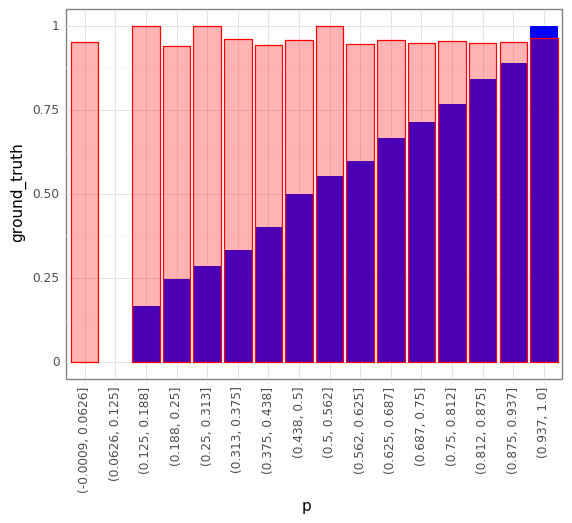

<ggplot: (8735082927125)>

In [244]:
def _bin_miscalibration(group):
    return pd.DataFrame([{
        'miscalibration': (group.pp - group.p).abs().mean(),
        'prediction': group.pp.mean(),
        'ground_truth': group.p.mean()
    }])

miscalibration = results.groupby(pd.cut(results.p, 16)).apply(_bin_miscalibration).reset_index()

print('expected calibration error', miscalibration.miscalibration.mean())

(
    ggplot(miscalibration)
    + geom_bar(
        aes(x='p', y='ground_truth'),
        stat='identity',
        fill='blue',
        alpha=1.0
    )
    + geom_bar(
        aes(x='p', y='prediction'),
        stat='identity',
        fill='red',
        color='red',
        alpha=0.3
    )
    + theme_fs()
    + theme(
        axis_text_x=element_text(rotation=90)
    )
)